# RoboSINDy: Project Introduction

**Authors**: Julian Skifstad and Advaith Balaji

This notebook implements the paper "Data-driven discovery of coordinates and governing equations" by Champion et al. on the Franka Panda Arm. The goal is to compare this method with e2c. This work aims to explore and evaluate the performance of these approaches in a robotic planar pushing task.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from numpngw import write_apng
from IPython.display import Image
from tqdm.notebook import tqdm

In [ ]:
from utils.panda_pushing_env import PandaImageSpacePushingEnv
from utils.visualizers import GIFVisualizer, NotebookVisualizer
from utils.utils import *
from sindy.SINDy import RoboSINDy

Assets dir: /Users/adibalaji/Desktop/UMICH-24-25/rob_learning/RoboSINDy/utils/assets


pybullet build time: Mar 23 2025 20:15:33


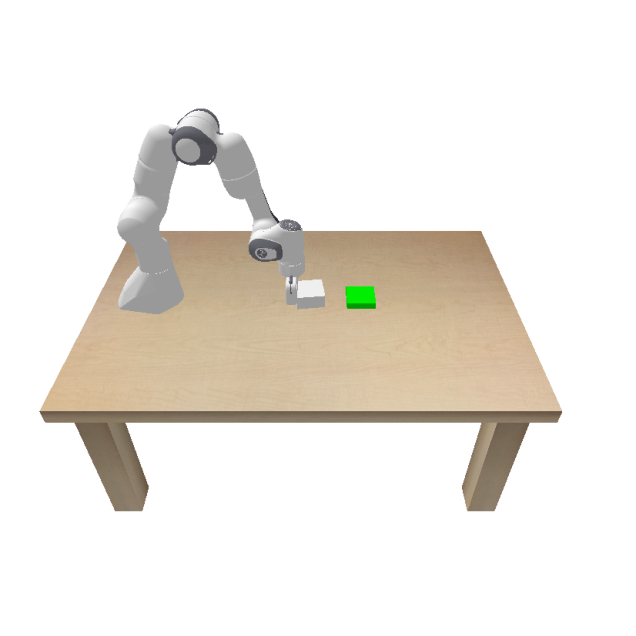

argv[0]=--opengl2


  0%|          | 0/3 [00:00<?, ?it/s]

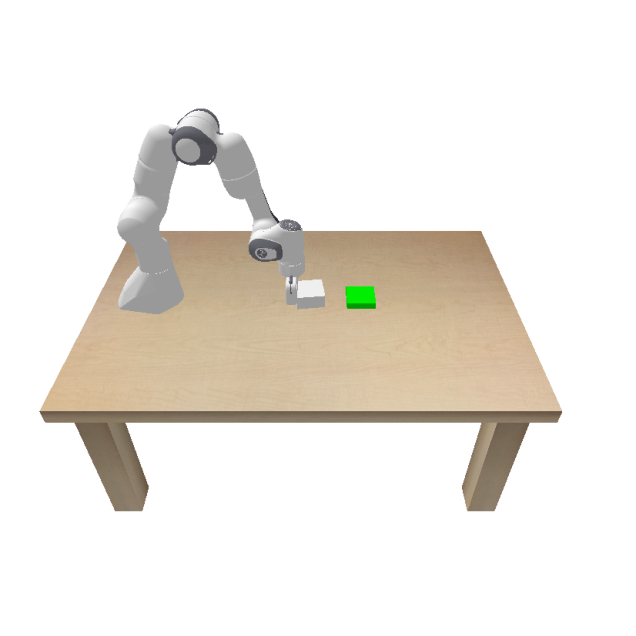

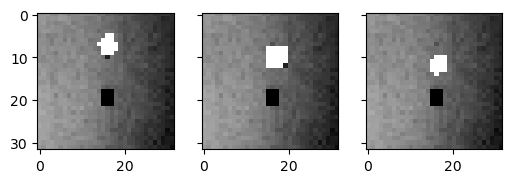

In [3]:
%matplotlib inline

# Create the visualizer
fig = plt.figure(figsize=(8,8))
hfig = display(fig, display_id=True)
visualizer = NotebookVisualizer(fig=fig, hfig=hfig)

# Initialize the simulation environment
env = PandaImageSpacePushingEnv(visualizer=visualizer,
                                render_non_push_motions=True,
                                camera_heigh=800,
                                camera_width=800,
                                grayscale=True,
                                done_at_goal=False)
env.reset()
# Perform a sequence of 3 random actions:
states = []
for i in tqdm(range(3)):
    action_i = env.action_space.sample()
    state, reward, done, info = env.step(action_i)
    states.append(state)
    if done:
        break

view_states(states)

plt.close(fig)